# Lesson 1 : Using CNN
***

### <font color=blue>Import all necessities</font>

In [1]:
%matplotlib inline

In [10]:
path = "data/dogscats/"

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


## Use a pretrained VGG model with our Vgg16 class

In [5]:
batch_size=64

In [6]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [11]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 655s - loss: 0.1250 - acc: 0.9667 - val_loss: 0.0473 - val_acc: 0.9830


In [12]:
vgg.model.save_weights(path+'results/lesson1_scratch.h5')

### <font color=blue>Plot some images (title on onehot encoding)...</font>

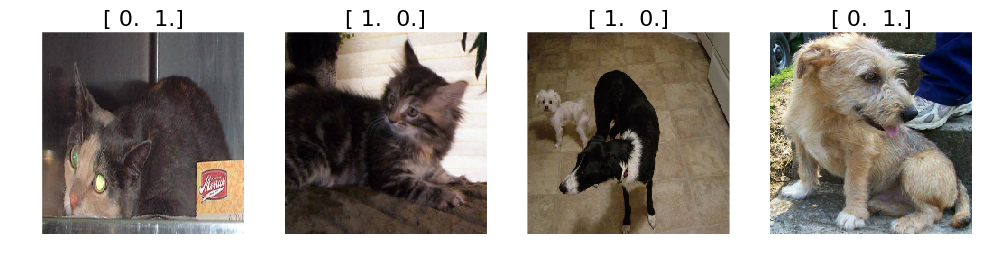

In [18]:
imgs,labels = next(batches)
plots(imgs[1:5], titles=labels)

### <font color=blue>Use these images to get back the probabilities</font>

In [37]:
vgg.predict(imgs, True)

(array([ 0.5642,  0.7294,  0.9912,  0.9701,  0.7047,  0.9746,  0.7954,  0.9957,  0.9938,  0.7411,
         0.8926,  0.5842,  0.794 ,  0.8927,  1.    ,  0.6067,  0.9801,  0.7663,  0.8857,  0.6197,
         0.77  ,  0.5595,  0.7781,  0.9057,  0.9685,  0.9961,  0.9811,  0.6845,  1.    ,  0.9791,
         0.999 ,  0.9983], dtype=float32),
 array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0]),
 ['dogs',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'cats',
  'cats',
  'dogs',
  'cats',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  'cats',
  'cats',
  'dogs',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  'cats',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'cats',
  'dogs',
  'cats',
  'cats'])

In [39]:
vgg.classes[:2]

['cats', 'dogs']

## Precisions

#### At the moment there are 1000 specific cathegories of cats and dogs on imagenet so we only want two categories. For this, we use finetuning (vgg.finetune() and vgg.fit()). Convolution layers are for finding patterns in images. Dense (fully connected) layers are for combining patterns accross an image.